In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
from datetime import datetime

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

of Set 3 | sao joao da barra
Processing Record 49 of Set 3 | changji
Processing Record 50 of Set 3 | talnakh
Processing Record 1 of Set 4 | tautira
Processing Record 2 of Set 4 | verkhnya syrovatka
Processing Record 3 of Set 4 | neiafu
Processing Record 4 of Set 4 | iqaluit
Processing Record 5 of Set 4 | darab
Processing Record 6 of Set 4 | tuktoyaktuk
Processing Record 7 of Set 4 | mbour
Processing Record 8 of Set 4 | bengkulu
Processing Record 9 of Set 4 | road town
Processing Record 10 of Set 4 | chumikan
Processing Record 11 of Set 4 | longyearbyen
Processing Record 12 of Set 4 | aykhal
Processing Record 13 of Set 4 | codrington
Processing Record 14 of Set 4 | pevek
Processing Record 15 of Set 4 | kahului
Processing Record 16 of Set 4 | garden city
Processing Record 17 of Set 4 | luderitz
Processing Record 18 of Set 4 | vaini
Processing Record 19 of Set 4 | roma
Processing Record 20 of Set 4 | clyde river
Processing Record 21 of Set 4 | bardiyah
Processing Record 22 of Set 4 | sale

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Columbia,34.0007,-81.0348,82.40,44,20,13.80,US,2021-03-28 19:00:48
1,Chokurdakh,70.6333,147.9167,-14.82,99,99,4.47,RU,2021-03-28 19:01:50
2,Wamba,8.9333,8.6000,86.52,17,0,2.33,NG,2021-03-28 19:01:51
3,Bredasdorp,-34.5322,20.0403,62.60,82,100,13.80,ZA,2021-03-28 19:01:51
4,Lompoc,34.6391,-120.4579,75.00,34,0,6.02,US,2021-03-28 18:57:49
5,Tilichiki,60.4667,166.1000,-9.31,92,20,7.00,RU,2021-03-28 19:01:52
6,Vanderhoof,54.0166,-124.0198,35.24,44,44,15.14,CA,2021-03-28 19:01:52
7,Diffa,13.3154,12.6113,78.40,20,0,10.78,NE,2021-03-28 19:01:53
8,Rio Gallegos,-51.6226,-69.2181,59.00,25,0,18.41,AR,2021-03-28 19:01:53
9,Souillac,-20.5167,57.5167,78.80,83,40,2.30,MU,2021-03-28 19:01:54


In [13]:
#reorder columns
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Columbia,US,2021-03-28 19:00:48,34.0007,-81.0348,82.40,44,20,13.80
1,Chokurdakh,RU,2021-03-28 19:01:50,70.6333,147.9167,-14.82,99,99,4.47
2,Wamba,NG,2021-03-28 19:01:51,8.9333,8.6000,86.52,17,0,2.33
3,Bredasdorp,ZA,2021-03-28 19:01:51,-34.5322,20.0403,62.60,82,100,13.80
4,Lompoc,US,2021-03-28 18:57:49,34.6391,-120.4579,75.00,34,0,6.02
5,Tilichiki,RU,2021-03-28 19:01:52,60.4667,166.1000,-9.31,92,20,7.00
6,Vanderhoof,CA,2021-03-28 19:01:52,54.0166,-124.0198,35.24,44,44,15.14
7,Diffa,NE,2021-03-28 19:01:53,13.3154,12.6113,78.40,20,0,10.78
8,Rio Gallegos,AR,2021-03-28 19:01:53,-51.6226,-69.2181,59.00,25,0,18.41
9,Souillac,MU,2021-03-28 19:01:54,-20.5167,57.5167,78.80,83,40,2.30


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

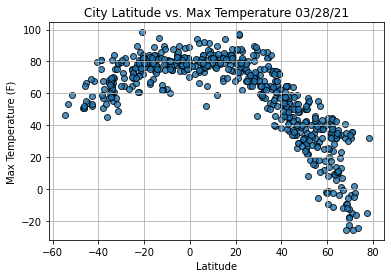

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

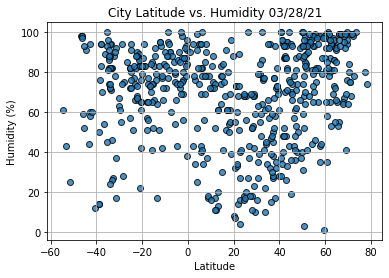

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

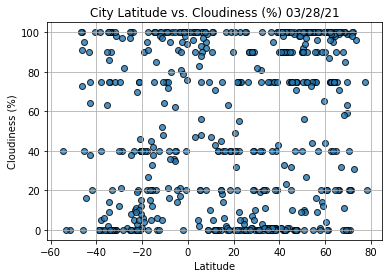

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

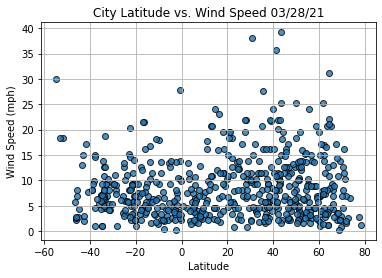

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()